In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [161]:
data = pd.read_csv('./boat_data.csv')

In [162]:
data['Year Built'].unique()

array([2017, 2020,    0, 2019, 1999, 2018, 1987, 2004, 1997, 1985, 1981,
       2011, 1979, 1998, 1994, 1996, 1972, 1980, 1974, 1983, 1991, 1992,
       1961, 2015, 2000, 1993, 1968, 2007, 1990, 2010, 1975, 1986, 1941,
       1971, 2005, 1995, 1976, 2001, 2006, 2016, 1984, 1964, 1978, 1940,
       1988, 2003, 1977, 1973, 1970, 1913, 1965, 1950, 2014, 2002, 1963,
       2008, 1948, 1960, 1930, 2009, 1989, 1969, 1982, 1937, 2013, 2012,
       1954, 1959, 1909, 1926, 1910, 1962, 1938, 1936, 1967, 1903, 1933,
       1906, 1908, 2021, 1927, 1929, 1956, 1958, 1922, 1952, 1957, 1928,
       1905, 1951, 1911, 1966, 1915, 1934, 1939, 1953, 1924, 1931, 1920,
       1898, 1955, 1907, 1885, 1895, 1914, 1901, 1942, 1919, 1925, 1889,
       1946, 1904, 1923, 1917, 1935, 1949, 1947, 1912, 1945, 1897, 1902,
       1900])

In [163]:
int(data[data['Year Built'] != data['Year Built'].min()]['Year Built'].mean())

2004

In [164]:
data_to_fixed_years=data[data['Year Built'] == 0]

In [165]:
data_to_fixed_years.iloc[:,4:5] = int(data[data['Year Built'] != data['Year Built'].min()]['Year Built'].mean())

/var/folders/j3/p5fccy8920s46lf3_h_xgx800000gn/T/ipykernel_50391/2053897922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_fixed_years.iloc[:,4:5] = int(data[data['Year Built'] != data['Year Built'].min()]['Year Built'].mean())


In [172]:
data = pd.concat([data,data_to_fixed_years],axis=0)

In [173]:
data.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,2004.863977,11.570017,3.520124,149.160801
std,15.895329,6.002820,1.220534,151.819752
min,1885.000000,1.040000,0.010000,13.000000
25%,2000.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


In [174]:
data.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [175]:
data.isna().sum().sum()

3194

In [176]:
data[data['Manufacturer'].isna()]

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland,474
17,DKK 30000,Sport Boat,NaN,Used boat,1985,4.00,1.00,NaN,Denmark,124
19,EUR 4000,Cabin Boat,NaN,"Used boat,Unleaded",2011,6.37,2.31,GRP,Germany,330
24,EUR 3900,Cabin Boat,NaN,Used boat,1985,6.53,2.47,NaN,France,383
28,CHF 4000,Fishing Boat,NaN,"Used boat,Unleaded",1994,5.60,1.58,GRP,Switzerland,641
...,...,...,...,...,...,...,...,...,...,...
9830,EUR 6900,Sport Boat,NaN,"Used boat,Unleaded",2004,6.00,1.95,GRP,Barssel,531
9848,EUR 5995,Trawler,NaN,Used boat,2004,6.50,3.00,Steel,Netherlands,204
9853,EUR 5950,Cabin Boat,NaN,"Used boat,Unleaded",2004,4.85,1.80,GRP,Germany,303
9864,EUR 4990,Sport Boat,NaN,"Used boat,Unleaded",2004,4.60,1.80,GRP,Germany,185


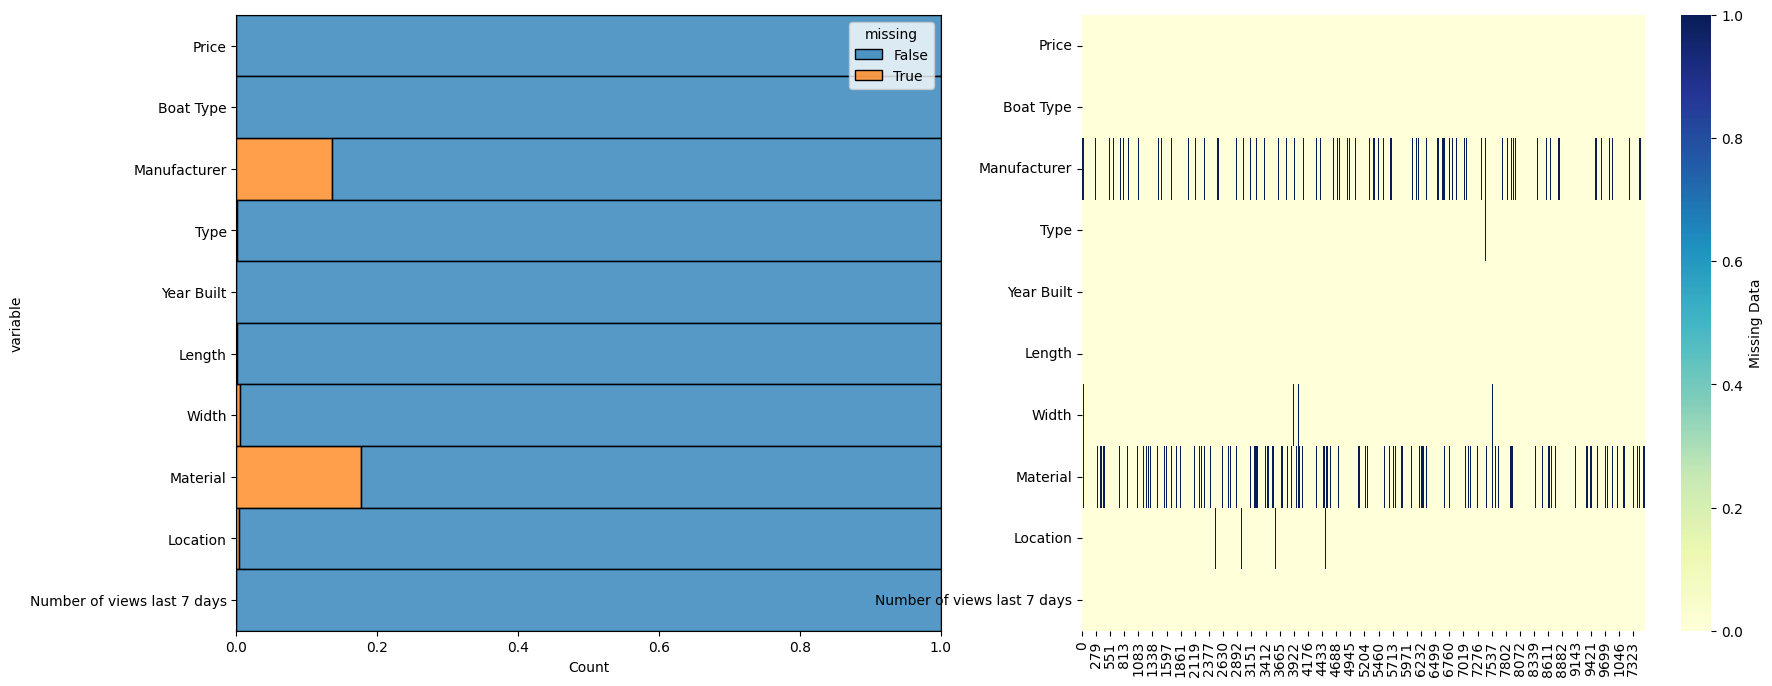

In [177]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sns.histplot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    ax = ax1
)
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'},
            ax=ax2
           )
plt.show();

In [178]:
data['Manufacturer'].mode()

0    BÃ©nÃ©teau power boats
Name: Manufacturer, dtype: object

In [179]:
data[data['Manufacturer'] == 'BÃ©nÃ©teau power boats']

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
18,EUR 4000,Pilothouse,BÃ©nÃ©teau power boats,"Used boat,Diesel",1981,8.00,2.84,PVC,France,265
148,EUR 12000,Sport Boat,BÃ©nÃ©teau power boats,"Used boat,Unleaded",1993,7.75,2.75,PVC,France,141
191,EUR 13500,Sport Boat,BÃ©nÃ©teau power boats,"Used boat,Diesel",2006,6.50,2.44,Steel,France,262
258,EUR 16900,Sport Boat,BÃ©nÃ©teau power boats,"Used boat,Unleaded",2003,5.47,2.34,PVC,Spain,152
304,EUR 18620,Pilothouse,BÃ©nÃ©teau power boats,new boat from stock,2020,5.52,2.43,NaN,Italy,73
...,...,...,...,...,...,...,...,...,...,...
6026,EUR 129000,Motor Yacht,BÃ©nÃ©teau power boats,"Used boat,Diesel",2004,10.45,3.72,NaN,Malta,36
7496,EUR 60475,Motor Yacht,BÃ©nÃ©teau power boats,new boat from stock,2004,8.10,2.50,NaN,Germany,33
7767,EUR 54700,Center console boat,BÃ©nÃ©teau power boats,"new boat from stock,Unleaded",2004,6.41,2.48,PVC,France,119
7803,EUR 53900,Pilothouse,BÃ©nÃ©teau power boats,new boat from stock,2004,7.48,2.50,GRP,Germany,117


In [180]:
data['Material'].mode()[0]

'GRP'

In [181]:
data['Material'].fillna(data['Material'].mode()[0], inplace=True)

In [182]:
data.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                          0
Location                         36
Number of views last 7 days       0
dtype: int64

In [183]:
data['Type'].mode()

0    Used boat,Diesel
Name: Type, dtype: object

In [184]:
data['Type'].fillna(data['Type'].mode()[0], inplace=True)

In [185]:
data['Width'].fillna(data['Width'].mean(), inplace=True)

In [186]:
data['Location'].fillna(data['Location'].mode()[0], inplace=True)

In [187]:
data['Length'].fillna(data['Length'].mean(), inplace=True)

In [188]:
data.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              0
Year Built                        0
Length                            0
Width                             0
Material                          0
Location                          0
Number of views last 7 days       0
dtype: int64

In [189]:
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,GRP,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,GRP,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58
6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland,474


In [190]:
imputation_data = data[['Number of views last 7 days', 'Year Built', 'Width', 'Length','Manufacturer']]
imputation_data.isna().sum()

Number of views last 7 days       0
Year Built                        0
Width                             0
Length                            0
Manufacturer                   1338
dtype: int64

In [191]:
data_to_impute = imputation_data[imputation_data['Manufacturer'].isna()]
data_to_impute.shape

(1338, 5)

In [192]:
imputation_data.dropna( inplace=True )
imputation_data.shape

/var/folders/j3/p5fccy8920s46lf3_h_xgx800000gn/T/ipykernel_50391/2157430875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputation_data.dropna( inplace=True )


(8550, 5)

In [193]:
x = imputation_data[['Number of views last 7 days', 'Year Built', 'Width', 'Length']]
y = imputation_data['Manufacturer'].astype('category').cat.codes


In [194]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [195]:
knn_model.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [196]:
test_x = data_to_impute[['Number of views last 7 days', 'Year Built', 'Width', 'Length']] 

In [197]:
predicted_y = knn_model.predict(test_x)

In [198]:
data_to_impute['Manufacturer'] = predicted_y
data_to_impute.head()

/var/folders/j3/p5fccy8920s46lf3_h_xgx800000gn/T/ipykernel_50391/3390539349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_impute['Manufacturer'] = predicted_y


,Number of views last 7 days,Year Built,Width,Length,Manufacturer
6,474,1999,2.38,6.20,112
17,124,1985,1.00,4.00,4
19,330,2011,2.31,6.37,309
24,383,1985,2.47,6.53,250
28,641,1994,1.58,5.60,190


In [199]:
data_to_impute.isna().sum()

Number of views last 7 days    0
Year Built                     0
Width                          0
Length                         0
Manufacturer                   0
dtype: int64

In [200]:
imputation_data.shape

(8550, 5)

In [201]:
imputed_data = pd.concat([imputation_data, data_to_impute], axis=0)


In [202]:
imputed_data.reset_index(inplace=True, drop=True)

In [203]:
imputed_data

,Number of views last 7 days,Year Built,Width,Length,Manufacturer
0,226,2017,1.90,4.00,Rigiflex power boats
1,75,2020,1.50,4.00,Terhi power boats
2,64,2020,1.00,3.00,Pioner power boats
3,58,2019,1.46,3.55,Linder power boats
4,45,2019,1.37,3.64,Crescent power boats
...,...,...,...,...,...
9883,531,2004,1.95,6.00,112
9884,204,2004,3.00,6.50,192
9885,303,2004,1.80,4.85,192
9886,185,2004,1.80,4.60,157


In [204]:
data.drop(['Number of views last 7 days', 'Year Built', 'Width', 'Length','Manufacturer'],inplace=True, axis=1)
data.shape

(9888, 5)

In [214]:
final_data = pd.concat([data, imputed_data], axis=1)
final_data.isna().sum()

Price                          0
Boat Type                      0
Type                           0
Material                       0
Location                       0
Number of views last 7 days    0
Year Built                     0
Width                          0
Length                         0
Manufacturer                   0
dtype: int64

In [215]:
broken_price = final_data['Price'].str.split(" ")

In [216]:
broken_price

0        [CHF, 3337]
1        [EUR, 3490]
3       [DKK, 25900]
4        [EUR, 3399]
6        [CHF, 3600]
            ...     
9876     [CHF, 5000]
9879     [CHF, 4990]
9880     [CHF, 4980]
9881     [CHF, 4950]
9884     [EUR, 4516]
Name: Price, Length: 9888, dtype: object

In [217]:
currency = []
price = []
for i in broken_price:
    currency.append(i[0])
    price.append(i[1])


In [218]:
final_data['Currency'] = currency
final_data['Price'] = price
final_data

,Price,Boat Type,Type,Material,Location,Number of views last 7 days,Year Built,Width,Length,Manufacturer,Currency
0,3337,Motor Yacht,new boat from stock,GRP,Switzerland,226,2017,1.90,4.00,Rigiflex power boats,CHF
1,3490,Center console boat,new boat from stock,Thermoplastic,Germany,75,2020,1.50,4.00,Terhi power boats,EUR
3,25900,Sport Boat,new boat from stock,GRP,Denmark,58,2019,1.46,3.55,Linder power boats,DKK
4,3399,Fishing Boat,new boat from stock,Aluminium,Germany,45,2019,1.37,3.64,Crescent power boats,EUR
6,3600,Catamaran,"Used boat,Unleaded",Aluminium,Switzerland,239,1987,1.75,4.35,Terhi power boats,CHF
...,...,...,...,...,...,...,...,...,...,...,...
9876,5000,Pilothouse,"Used boat,Unleaded",GRP,Switzerland,181,2004,2.00,6.00,8,CHF
9879,4990,Sport Boat,new boat on order,GRP,Switzerland,245,2004,2.50,5.70,413,CHF
9880,4980,Sport Boat,new boat from stock,Aluminium,Switzerland,128,2004,2.20,6.30,399,CHF
9881,4950,Sport Boat,new boat from stock,Aluminium,Switzerland,281,2004,2.75,12.70,431,CHF


In [219]:
final_data['Price'] = final_data['Price'].astype(float)

In [221]:
final_data.to_csv('clean_boat_data.csv', index=False)